# 課題10
gpsデータの解析

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import folium
import pandas as pd
import numpy as np

In [2]:
# fnamer = "log/matsumoto-nagano-100318.log"
fnamer = "log/nagano-matsumoto-100318.log"

with open(fnamer, "r") as f:
    gpgga_list = []
    for i in f.readlines():
        elements = i.split(",")
        if elements[0] == "$GPGGA":
            gpgga_list.append(elements[1:-1])
gpgga_df = pd.DataFrame(gpgga_list, columns=[
    "time", "lat", "NS", "lon", "EW",
    "qu", "satellites", "harr",
    "elev", "elev_m", "geoid", "geoid_m",
    "DGPS"
])
gpgga_df

,time,lat,NS,lon,EW,qu,satellites,harr,elev,elev_m,geoid,geoid_m,DGPS
0,012312,3637.8827,N,13811.4093,E,1,05,02.5,00351.5,M,037.4,M,00
1,012327,3637.8844,N,13811.4088,E,1,05,02.5,00354.3,M,037.4,M,00
2,012342,3637.8847,N,13811.4086,E,1,05,02.5,00360.4,M,037.4,M,00
3,012357,3637.8881,N,13811.4069,E,1,04,06.3,00356.6,M,037.4,M,00
4,012412,3637.8878,N,13811.4047,E,1,05,03.2,00358.6,M,037.4,M,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,030709,3614.3477,N,13758.3616,E,1,08,01.0,00597.8,M,037.4,M,00
405,030724,3614.3345,N,13758.4639,E,1,07,01.2,00599.5,M,037.4,M,00
406,030739,3614.3176,N,13758.5716,E,1,08,01.0,00595.7,M,037.4,M,00
407,030754,3614.3228,N,13758.6188,E,1,07,01.2,00604.5,M,037.4,M,00


In [3]:
def decode_lat_lon(df, column):
    """
    緯度経度をradianに変換
    """
    tmp = df[column].astype(float)
    df[column] = ((tmp / 100).astype(int) + (tmp % 100) / 60)
#     df[column] = ((tmp / 100).astype(int) + (tmp % 100) / 60).apply(np.deg2rad)

In [4]:
decode_lat_lon(gpgga_df, "lat")
gpgga_df["lat"] = gpgga_df["lat"] * ((gpgga_df.pop("NS") == "N") * 2 - 1)
decode_lat_lon(gpgga_df, "lon")
gpgga_df["lon"] = gpgga_df["lon"] * ((gpgga_df.pop("EW") == "E") * 2 - 1)
gpgga_df

,time,lat,lon,qu,satellites,harr,elev,elev_m,geoid,geoid_m,DGPS
0,012312,36.631378,138.190155,1,05,02.5,00351.5,M,037.4,M,00
1,012327,36.631407,138.190147,1,05,02.5,00354.3,M,037.4,M,00
2,012342,36.631412,138.190143,1,05,02.5,00360.4,M,037.4,M,00
3,012357,36.631468,138.190115,1,04,06.3,00356.6,M,037.4,M,00
4,012412,36.631463,138.190078,1,05,03.2,00358.6,M,037.4,M,00
...,...,...,...,...,...,...,...,...,...,...,...
404,030709,36.239128,137.972693,1,08,01.0,00597.8,M,037.4,M,00
405,030724,36.238908,137.974398,1,07,01.2,00599.5,M,037.4,M,00
406,030739,36.238627,137.976193,1,08,01.0,00595.7,M,037.4,M,00
407,030754,36.238713,137.976980,1,07,01.2,00604.5,M,037.4,M,00


In [5]:
fig = folium.Figure()

center_lat = 36.45
center_lon = 138.0

m = folium.Map([center_lat, center_lon], zoom_start=10).add_to(fig)
for i in gpgga_df.index:
    folium.Marker(location=[gpgga_df["lat"][i], gpgga_df["lon"][i]]).add_to(m)
m

In [6]:
gpgga_df_a = gpgga_df[1:].copy()
gpgga_df_b = gpgga_df[:-1].copy()
gpgga_df_a["lat_prev"] = list(gpgga_df_b["lat"])
gpgga_df_a["lon_prev"] = list(gpgga_df_b["lon"])
gpgga_df_a

,time,lat,lon,qu,satellites,harr,elev,elev_m,geoid,geoid_m,DGPS,lat_prev,lon_prev
1,012327,36.631407,138.190147,1,05,02.5,00354.3,M,037.4,M,00,36.631378,138.190155
2,012342,36.631412,138.190143,1,05,02.5,00360.4,M,037.4,M,00,36.631407,138.190147
3,012357,36.631468,138.190115,1,04,06.3,00356.6,M,037.4,M,00,36.631412,138.190143
4,012412,36.631463,138.190078,1,05,03.2,00358.6,M,037.4,M,00,36.631468,138.190115
5,012428,36.631623,138.190010,1,06,01.9,00351.7,M,037.4,M,00,36.631463,138.190078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,030709,36.239128,137.972693,1,08,01.0,00597.8,M,037.4,M,00,36.239300,137.971663
405,030724,36.238908,137.974398,1,07,01.2,00599.5,M,037.4,M,00,36.239128,137.972693
406,030739,36.238627,137.976193,1,08,01.0,00595.7,M,037.4,M,00,36.238908,137.974398
407,030754,36.238713,137.976980,1,07,01.2,00604.5,M,037.4,M,00,36.238627,137.976193


In [7]:
Rx = 6378137.0 # 長半径 (m)
Ry = 6356752.314245 # 短半径(m)
E = np.sqrt((Rx ** 2 - Ry ** 2) / Rx ** 2) # 第一離心率

total_dist = 0.0

for i in gpgga_df_a.index:
    row = gpgga_df_a.loc[i, :]
    P = np.deg2rad((row["lat"] + row["lat_prev"]) / 2)
    W = np.sqrt(1 - E ** 2 * np.sin(P) ** 2)
    M = Rx * (1 - E ** 2) / (W ** 3) # 子午線曲率半径
    N = Rx / W # 卯酉線曲率半径
    Dy = np.deg2rad(row["lat"] - row["lat_prev"])
    Dx = np.deg2rad(row["lon"] - row["lon_prev"])
    total_dist += np.sqrt((Dy * M) ** 2 + (Dx * N * np.cos(P)) ** 2)

total_dist / 1000

70.59182956007088

In [8]:
P = np.deg2rad((gpgga_df_a["lat"] + gpgga_df_a["lat_prev"]) / 2)
W = P.apply(lambda x: np.sqrt(1 - E ** 2 * np.sin(x) ** 2))
M = W.apply(lambda x: Rx * (1 - E ** 2) / x ** 3) # 子午線曲率半径
N = W.apply(lambda x: Rx / x) # 卯酉線曲率半径
Dy = (gpgga_df_a["lat"] - gpgga_df_a["lat_prev"]).apply(np.deg2rad)
Dx = (gpgga_df_a["lon"] - gpgga_df_a["lon_prev"]).apply(np.deg2rad)
D = ((Dy * M) ** 2 + (Dx * N * P.apply(np.cos)) ** 2).apply(np.sqrt)

D.sum() / 1000

70.59182956007085

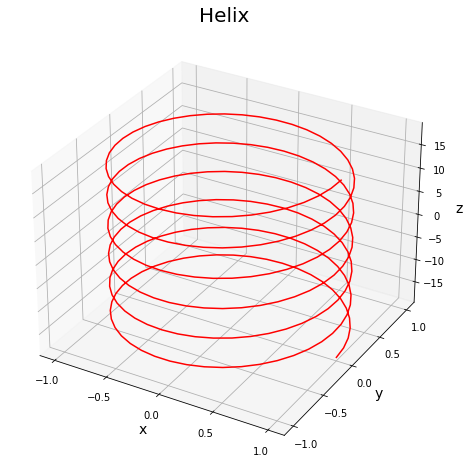

In [9]:
# PYTHON_MATPLOTLIB_3D_PLOT_01

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Figureを追加
fig = plt.figure(figsize = (8, 8))

# 3DAxesを追加
ax = fig.add_subplot(111, projection='3d')

# Axesのタイトルを設定
ax.set_title("Helix", size = 20)

# 軸ラベルを設定
ax.set_xlabel("x", size = 14)
ax.set_ylabel("y", size = 14)
ax.set_zlabel("z", size = 14)

# 軸目盛を設定
ax.set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])

# 円周率の定義
pi = np.pi

# パラメータ分割数
n = 256

# パラメータtを作成
t = np.linspace(-6*pi, 6*pi, n)

# らせんの方程式
x = np.cos(t)
y = np.sin(t)
z = t

# 曲線を描画
ax.plot(x, y, z, color = "red")

plt.show()